In [23]:
import pickle
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import chi2
from sklearn import preprocessing
import numpy as np
from sklearn import metrics
from scipy.special import logit, expit
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.special import entr
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('data/df_level2.csv')

df['STRATIO_scaled'] = preprocessing.scale(df.STRATIO)
df['SCHSIZE_scaled'] = preprocessing.scale(df.SCHSIZE)
df['mean_ESCS_std_scaled'] = preprocessing.scale(df.mean_ESCS_std)

In [3]:
Q = pd.read_excel('data/iso_countries.xlsx')
Q = Q.replace({'QCI': 'CHN'})

In [25]:
n_fix = 2
ran_var = 'False'
ran_int = 'True'
tol = 0.01
variab = 'SE'
model = 'P'

path = 'output/case_study_results'


fileA = open(path + '/' + ran_var + '_' + ran_int + '_' + str(n_fix) + '_' + variab + '_' + str(tol) + '_' + model + '_merging' +'.pickle','rb')

knots, par, W, hess_ran, hess_fix, group, modeleval = pickle.load(fileA)


In [26]:
modeleval

[[array([ 1.26430771,  1.619041  ,  1.56268295,  0.82220986,  0.24072853,
          2.01203258,  0.12977107,  0.61466708,  0.30354429,  0.62944296,
          1.06211117,  0.4843302 ,  1.43525554,  0.21756381,  1.01743638,
          1.79366618, -0.5106292 ,  1.28874115,  2.28046916,  2.2804322 ,
          0.53418571,  0.76893964,  0.89403508,  0.51045402,  1.63482152,
          2.02920651,  1.62506911,  0.32719472,  1.79880735,  0.56459065,
          0.65257317,  0.88128187,  0.83131237,  0.25129945,  2.27275724,
          1.6557299 ,  1.80135228,  0.22004062,  0.22272202,  1.77202869,
          1.55621983,  0.1178226 ,  1.63985648,  2.28071144,  1.17205736,
          1.77416442,  0.2942172 ,  0.6502531 ,  1.76422707,  1.78775214]),
  array([ 1.22814318,  1.63360412,  1.5037016 ,  0.81042812,  0.25619595,
          1.92498261,  0.06888639,  0.58333507,  0.32697044,  0.6014542 ,
          1.05912259,  0.3830601 ,  1.37672811,  0.20644582,  0.9909902 ,
          1.70663833, -0.66720547,  

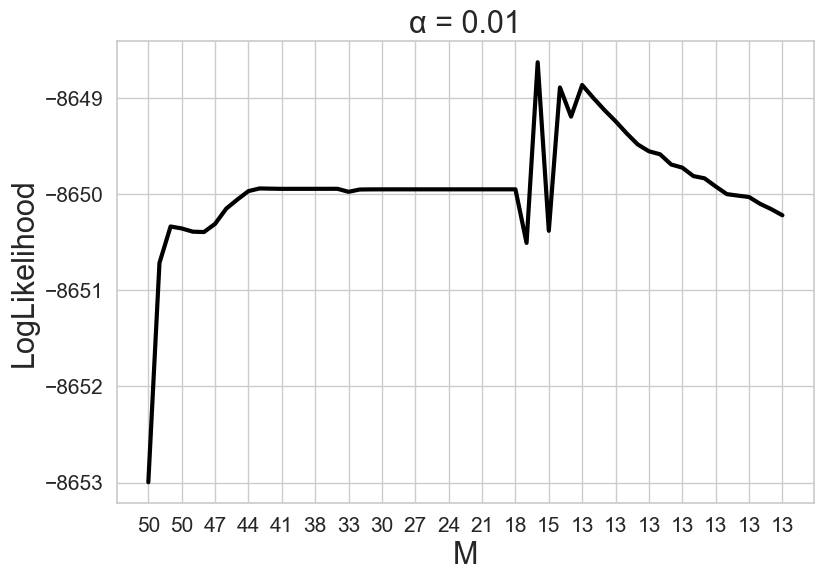

In [27]:
# Assuming modeleval[0] is a list of arrays
data = modeleval[1][1:]
array_lengths = [len(array) for array in modeleval[0][1:]]

# Set the sampling interval
n = 3  # You can change this to the desired interval

# Create a seaborn plot
sns.set(style="whitegrid")
plt.figure(figsize=(9, 6))  # Set the figure size as needed

# Plot the data
x_values = range(len(array_lengths))
x_labels = array_lengths[::n]  # Sample every nth label
sns.lineplot(x=x_values, y=data, linewidth=3, color='black')
plt.xticks(x_values[::n], x_labels)#, rotation=90)
plt.xlabel('M', fontsize=22)  # Set x-axis label
plt.ylabel('LogLikelihood', fontsize=22)  # Set y-axis label
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('α = ' + str(tol), fontsize=22)  # Set the plot title

plt.savefig("output/case_study_results/LogLik" + str(model) + str(tol) + ".pdf")
plt.show()

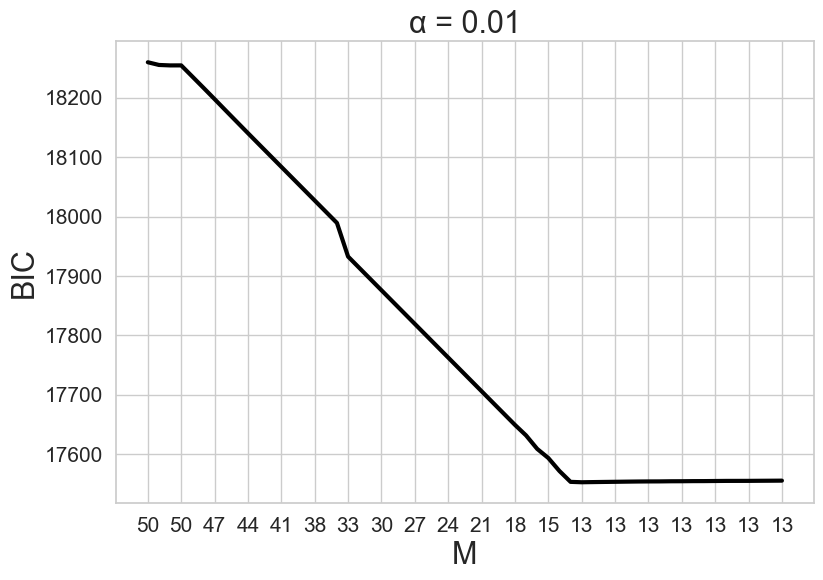

In [28]:
# Assuming modeleval[0] is a list of arrays
data = modeleval[2][1:]
array_lengths = [len(array) for array in modeleval[0][1:]]

# Set the sampling interval
n = 3  # You can change this to the desired interval

# Create a seaborn plot
sns.set(style="whitegrid")
plt.figure(figsize=(9, 6))  # Set the figure size as needed

# Plot the data
x_values = range(len(array_lengths))
x_labels = array_lengths[::n]  # Sample every nth label
sns.lineplot(x=x_values, y=data,  linewidth=3, color='black')
plt.xticks(x_values[::n], x_labels)#, rotation=90)
plt.xlabel('M', fontsize=22)  # Set x-axis label
plt.ylabel('BIC', fontsize=22)  # Set y-axis label
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('α = ' + str(tol), fontsize=22)  # Set the plot title

plt.savefig("output/case_study_results/BIC" + str(model) + str(tol) + ".pdf")
plt.show()

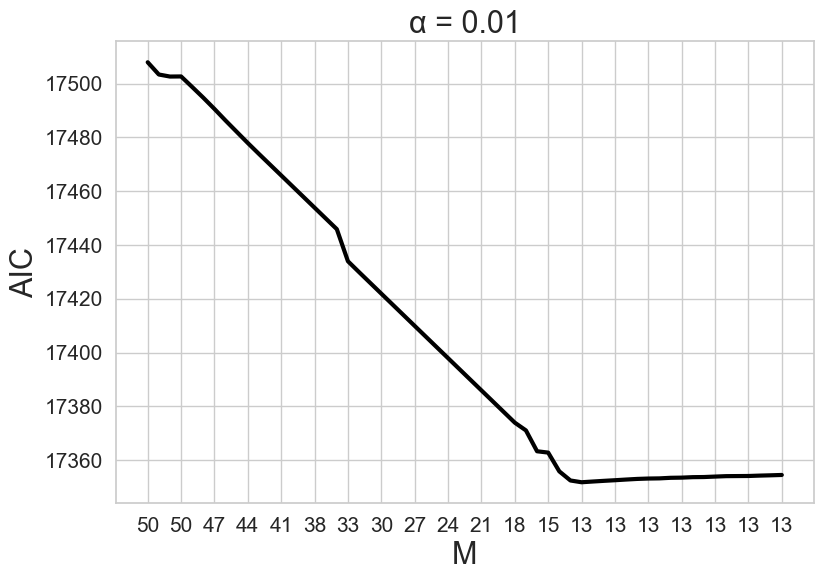

In [29]:
# Assuming modeleval[0] is a list of arrays

data = modeleval[3][1:]
array_lengths = [len(array) for array in modeleval[0][1:]]

# Set the sampling interval
n = 3  # You can change this to the desired interval

# Create a seaborn plot
sns.set(style="whitegrid")
plt.figure(figsize=(9, 6))  # Set the figure size as needed

# Plot the data
x_values = range(len(array_lengths))
x_labels = array_lengths[::n]  # Sample every nth label
sns.lineplot(x=x_values, y=data, linewidth=3, color='black')
plt.xticks(x_values[::n], x_labels)#, rotation=90)
plt.xlabel('M', fontsize=22)  # Set x-axis label
plt.ylabel('AIC', fontsize=22)  # Set y-axis label
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('α = ' + str(tol), fontsize=22)  # Set the plot title

plt.savefig("output/case_study_results/AIC" + str(model) + str(tol) + ".pdf")
plt.show()

In [30]:
entropy = []
subpops = W.shape[1]
for i in range(W.shape[0]):
    entropy.append(entr(W[i,:]).sum())
print(np.mean(entropy)/np.log(subpops))


0.06513359335659623


In [31]:
knots

array([ 1.22855421,  1.65442441,  1.48239526,  0.83052093,  0.08167904,
        1.91989394,  0.54973077,  0.3508778 ,  1.12175468,  1.36112316,
       -0.6683139 ,  2.26765735,  0.65573214])

In [32]:
group

array([12,  0,  4, 10,  9, 12, 11,  3, 12,  8,  2,  4,  0,  4,  6, 12,  2,
        9, 12,  0,  7, 12,  0,  9,  3,  7,  1,  8,  1,  0,  8,  1,  0,  8,
        1,  6,  7,  5,  5,  7,  4,  3,  7,  6,  8,  9,  8,  7,  3,  8])

In [33]:
range(len(knots))

range(0, 13)

In [12]:
df.groupby('CNT').count().reset_index()['CNT']

0                  Albania
1                Argentina
2                Australia
3          B-S-J-Z (China)
4        Baku (Azerbaijan)
5                   Brazil
6        Brunei Darussalam
7                    Chile
8           Chinese Taipei
9                 Colombia
10              Costa Rica
11                 Denmark
12      Dominican Republic
13                 Estonia
14                  France
15                 Georgia
16                  Greece
17               Indonesia
18                 Ireland
19                  Israel
20                   Italy
21                   Japan
22                  Jordan
23              Kazakhstan
24                 Lebanon
25               Lithuania
26              Luxembourg
27                Malaysia
28                   Malta
29                  Mexico
30                 Moldova
31                 Morocco
32                  Panama
33                    Peru
34             Philippines
35                  Poland
36                Portugal
3

In [34]:
X = pd.DataFrame({'cluster': range(len(knots)), 'knots': knots})
Y = pd.DataFrame({'Country': df.groupby('CNT').count().reset_index()['CNT'], 'cluster': group})
Z = Y.merge(X, on=['cluster'])
Z

,Country,cluster,knots
0,Albania,12,0.655732
1,Brazil,12,0.655732
2,Chinese Taipei,12,0.655732
3,Georgia,12,0.655732
4,Ireland,12,0.655732
5,Japan,12,0.655732
6,Argentina,0,1.228554
7,Dominican Republic,0,1.228554
8,Israel,0,1.228554
9,Jordan,0,1.228554


In [35]:
par

array([-1.36144121, -0.09391755])

In [36]:
knots

array([ 1.22855421,  1.65442441,  1.48239526,  0.83052093,  0.08167904,
        1.91989394,  0.54973077,  0.3508778 ,  1.12175468,  1.36112316,
       -0.6683139 ,  2.26765735,  0.65573214])

In [37]:
pd.DataFrame({'knots':knots,
              'stderr': np.round(np.array(np.sqrt(1 / hess_ran)).flatten(),3)})

,knots,stderr
0,1.228554,0.011
1,1.654424,0.023
2,1.482395,0.020
3,0.830521,0.014
4,0.081679,0.020
5,1.919894,0.017
6,0.549731,0.021
7,0.350878,0.018
8,1.121755,0.010
9,1.361123,0.012


In [17]:
np.array(st.norm.ppf(1 - tol / 2) * np.sqrt(1 / hess_ran))#[2][0]

array([[0.04524431],
       [0.06509048],
       [0.03559024],
       [0.05859961],
       [0.03886832],
       [0.17966956],
       [0.04093814],
       [0.08055391],
       [0.02391871],
       [0.02287725],
       [0.0391517 ],
       [0.02890277],
       [0.04275743],
       [0.03252767],
       [0.03023875],
       [0.02180743]])

In [18]:
np.sqrt(1 / hess_fix)

array([0.00692392, 0.00407331])

In [19]:
par

array([-1.36125775, -0.09399349])

In [20]:
Z = Z.merge(Q, on=['Country'])
y = df['Y_BIN_MATH']
df['Country'] = df['CNT']
df = df.merge(Z, on=['Country'])

In [21]:
df

,CNTSCHID,CNT,PRIVATESCH,STRATIO,SCHSIZE,sum_MATHbelow,mean_ESCS,mean_ESCS_std,Y_MATH,Y_BIN_MATH,STRATIO_scaled,SCHSIZE_scaled,mean_ESCS_std_scaled,Country,cluster,knots,ISO
0,800004,Albania,public,9.7619,205,11,-1.152958,-0.268234,5,1,-0.436611,-0.725775,-0.268767,Albania,14,0.654830,ALB
1,800006,Albania,public,18.0000,315,15,-1.343747,-0.565595,5,1,0.375855,-0.599796,-0.566719,Albania,14,0.654830,ALB
2,800007,Albania,public,4.7368,45,2,-2.401967,-2.214922,4,1,-0.932202,-0.909017,-2.219323,Albania,14,0.654830,ALB
3,800008,Albania,private,13.8125,221,6,-0.135900,1.316941,3,1,-0.037129,-0.707451,1.319557,Albania,14,0.654830,ALB
4,800009,Albania,public,16.9691,823,19,-0.560240,0.655569,2,0,0.274185,-0.018002,0.656871,Albania,14,0.654830,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12615,97500358,B-S-J-Z (China),public,8.0786,1131,0,0.828180,1.595021,0,0,-0.602623,0.334739,1.598190,B-S-J-Z (China),5,-0.668334,CHN
12616,97500359,B-S-J-Z (China),public,11.3202,2298,0,-0.178994,0.251551,0,0,-0.282927,1.671262,0.252051,B-S-J-Z (China),5,-0.668334,CHN
12617,97500360,B-S-J-Z (China),public,9.7932,2605,0,0.190169,0.743977,0,0,-0.433524,2.022858,0.745455,B-S-J-Z (China),5,-0.668334,CHN
12618,97500361,B-S-J-Z (China),public,11.7941,2005,3,-0.929946,-0.750143,0,0,-0.236189,1.335700,-0.751634,B-S-J-Z (China),5,-0.668334,CHN


In [22]:
df_pred = pd.read_csv('output/df_level2_pred.csv')
df_pred

,CNTSCHID,CNT,PRIVATESCH,STRATIO,SCHSIZE,sum_READbelow,sum_MATHbelow,sum_SCIEbelow,mean_ESCS,mean_ESCS_std,Y_READ,Y_MATH,Y_SCIE,Y_BIN_MATH,Y_BIN_SCIE,Y_BIN_READ,pred_GLMM_Poi,pred_GLMM_Ber
0,800004,Albania,public,9.7619,205,12,11,11,-1.152958,-0.268234,6,5,5,1,1,1,5.781017,0.784725
1,800006,Albania,public,18.0000,315,17,15,16,-1.343747,-0.565595,5,5,5,1,1,1,5.010674,0.745180
2,800007,Albania,public,4.7368,45,3,2,2,-2.401967,-2.214922,7,4,4,1,1,1,8.922084,0.956899
3,800008,Albania,private,13.8125,221,7,6,9,-0.135900,1.316941,3,3,4,1,1,1,4.850775,0.560730
4,800009,Albania,public,16.9691,823,29,19,29,-0.560240,0.655569,4,2,4,0,1,1,2.023349,0.172899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12615,97500358,B-S-J-Z (China),public,8.0786,1131,0,0,0,0.828180,1.595021,0,0,0,0,0,0,0.280770,0.004108
12616,97500359,B-S-J-Z (China),public,11.3202,2298,0,0,0,-0.178994,0.251551,0,0,0,0,0,0,0.051849,0.000128
12617,97500360,B-S-J-Z (China),public,9.7932,2605,0,0,0,0.190169,0.743977,0,0,0,0,0,0,0.030681,0.000030
12618,97500361,B-S-J-Z (China),public,11.7941,2005,5,3,3,-0.929946,-0.750143,0,0,0,0,0,0,0.089981,0.000708


In [24]:
def plot_roc_curve(fpr, tpr, title):
    plt.plot(fpr, tpr, color='dimgrey', label='ROC')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.rcParams["figure.figsize"] = (5.5,4)
    plt.title(title)
    plt.savefig("output/case_study_results/" + str(title) + ".pdf")
    plt.legend()
    plt.show()

In [25]:
if model == 'B':
  # GLMMDRE
  print('GLMMDRE')

  val = np.array( df['knots'] + par[0] * df['SCHSIZE_scaled'] + par[1] * df['mean_ESCS_std_scaled'] )
  pred_GLMMDRE = np.array( expit(val) )
  fpr, tpr, thresholds = metrics.roc_curve(y, pred_GLMMDRE, pos_label=1)

  optimal_idx = np.argmax(tpr - fpr)
  optimal_threshold = thresholds[optimal_idx]
  print("Threshold value is:", optimal_threshold)

  print('AUC', metrics.auc(fpr, tpr))
  print(plot_roc_curve(fpr, tpr, '(a) ROC curve - GLMMDRE'))

  pred_GLMMDRE_thr = [1 if(x > optimal_threshold) else 0 for x in pred_GLMMDRE]
  misclass_table = confusion_matrix(y, pred_GLMMDRE_thr)
  sens = misclass_table[1,1]/(misclass_table[1,1] + misclass_table[0,1])
  print('Sensitivity', sens)
  spec = misclass_table[0,0]/(misclass_table[0,0] + misclass_table[1,0])
  print('Specificity', spec)
  fpr = 1 - spec
  print('FPR', fpr)
  acc  = (misclass_table[0,0] + misclass_table[1,1])/(misclass_table[0,0] + misclass_table[1,1] + misclass_table[1,0] + misclass_table[0,1])
  print('Accuracy', acc)
  aper = 1 - acc
  print('APER', aper)



  # GLMM
  print('GLMM')
  fpr, tpr, thresholds = metrics.roc_curve(y, df_pred['pred_GLMM_Poi'], pos_label=1)

  optimal_idx = np.argmax(tpr - fpr)
  optimal_threshold = thresholds[optimal_idx]
  print("Threshold value is:", optimal_threshold)

  print('AUC', metrics.auc(fpr, tpr))
  print(plot_roc_curve(fpr, tpr, '(b) ROC curve - GLMM'))

  pred_GLMM_thr = [1 if(x > optimal_threshold) else 0 for x in pred_GLMMDRE]
  misclass_table = confusion_matrix(y, pred_GLMM_thr)
  sens = misclass_table[1,1]/(misclass_table[1,1] + misclass_table[0,1])
  print('Sensitivity', sens)
  spec = misclass_table[0,0]/(misclass_table[0,0] + misclass_table[1,0])
  print('Specificity', spec)
  fpr = 1 - spec
  print('FPR', fpr)
  acc  = (misclass_table[0,0] + misclass_table[1,1])/(misclass_table[0,0] + misclass_table[1,1] + misclass_table[1,0] + misclass_table[0,1])
  print('Accuracy', acc)
  aper = 1 - acc
  print('APER', aper)



elif model == 'P':

  # GLMMDRE
  print('GLMMDRE')

  val = (df['knots'] + par[0] * df['SCHSIZE_scaled'] + par[1] * df['mean_ESCS_std_scaled']).values
  y_pred = np.round(np.exp(val))
  y = df['Y_MATH']

  MSE = np.mean((y - y_pred)**2)
  MSE_log = np.mean((np.log(y+1) - np.log(y_pred+1))**2)
  CSE = np.mean((y - y_pred)**2 / (y_pred+1))
  print('MSE', MSE)
  print('MSE_log', MSE_log)
  print('CSE', CSE)



  # GLMM
  print('GLMM')
  y_pred = np.round(df_pred['pred_GLMM_Poi'])
  y = df['Y_MATH']

  MSE = np.mean((y - y_pred)**2)
  MSE_log = np.mean((np.log(y+1) - np.log(y_pred+1))**2)
  CSE = np.mean((y - y_pred)**2 / (y_pred+1))
  print('MSE', MSE)
  print('MSE_log', MSE_log)
  print('CSE', CSE)

  y_pred = np.round(df_pred['pred_GLMM_Poi'])
  y = df['Y_MATH']

SPGLMM
MSE 27.460776545166404
MSE_log 0.2827348077098574
CSE 2.3728236556905395
GLMM
MSE 27.405705229793977
MSE_log 0.28178638992484056
CSE 2.3687463581505024


In [26]:
val = (df['knots'] + par[0] * df['SCHSIZE_scaled'] + par[1] * df['mean_ESCS_std_scaled']).values
print(val)
np.round(np.exp(val))

[ 1.66898503  1.52548523  2.10145533 ... -3.49145821 -2.41569214
 -3.76145641]


array([5., 5., 8., ..., 0., 0., 0.])

In [27]:
# FOR THE COMPUTATION OF THE P-VALUES

n_fix = 1

variab = 'S'
fileA = open('output/case_study_results/' + ran_var + '_' + ran_int + '_' + str(n_fix) + '_' + variab + '_' + str(tol) + '_' + model + '_merging' +'.pickle','rb')
knots, par, W, hess_ran, hess_fix, group, a_ristr = pickle.load(fileA)
LR = 2 * (a - a_ristr)
print('p-value, LR test ' + variab)
print(chi2.sf(LR,1))


variab = 'E'
fileA = open('output/case_study_results/' + ran_var + '_' + ran_int + '_' + str(n_fix) + '_' + variab + '_' + str(tol) + '_' + model + '_merging' +'.pickle','rb')
knots, par, W, hess_ran, hess_fix, group, a_ristr = pickle.load(fileA)
LR = 2 * (a - a_ristr)
print('p-value, LR test ' + variab)
print(chi2.sf(LR,1))


NameError: name 'a' is not defined

# PLOT ON MAPS

In [28]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf = world.merge(Z, how='left', left_on='iso_a3', right_on='ISO')

/var/folders/lg/0lc2g3rx12jf4ztglsz2bgc80000gn/T/ipykernel_41136/4163474315.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


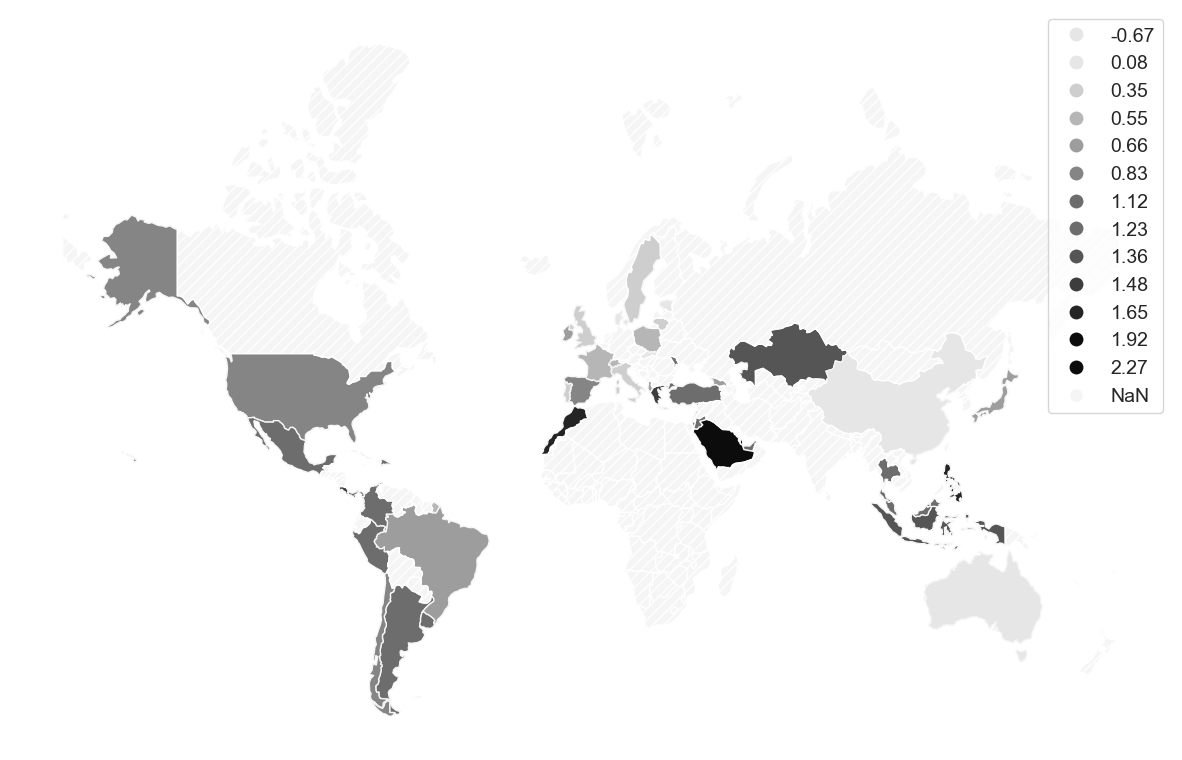

In [29]:
# Remove territories close to the poles for plotting in pseudo mercator and reproject to pm
gdf = gdf[~(gdf.iso_a3.isin(['ATA', 'GRL', 'ATF']))].to_crs('epsg:3857')
gdf['knots'] = gdf.knots.round(2)

import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis_big = mpl.colormaps['binary']
newcmp = ListedColormap(viridis_big(np.linspace(0.1, 0.95, 10)))

gdf.plot(
    column = 'knots',
    figsize = (15,10),
    missing_kwds = {
        'edgecolor': 'white',#'whitesmoke',
        'facecolor': 'whitesmoke',#'gainsboro', #'lightgray',
        "hatch": "///"},
    cmap = newcmp, #Spectral', #'YlOrBr',
    categorical = True,
    legend = True,
    legend_kwds={'fontsize': 14},
    edgecolors = 'whitesmoke' #'lightgray' #'whitesmoke' #'lightgray'
)

plt.axis('off')
if model == 'P':
  if tol == 0.01:
    #plt.title('Poisson response  -  α = 0.01')
    plt.savefig('output/case_study_results/Map_Poi_001.pdf', bbox_inches='tight')
  elif tol == 0.05:
    #plt.title('Poisson response  -  α = 0.05')
    plt.savefig('output/case_study_results/Map_Poi_005.pdf', bbox_inches='tight')
  elif tol == 0.1:
    #plt.title('Poisson response  -  α = 0.10')
    plt.savefig('output/case_study_results/Map_Poi_010.pdf', bbox_inches='tight')
elif model == 'B':
  if tol == 0.01:
    #plt.title('Bernoulli response  -  α = 0.01')
    plt.savefig('output/case_study_results/Map_Ber_001.pdf', bbox_inches='tight')
  elif tol == 0.05:
    #plt.title('Bernoulli response  -  α = 0.05')
    plt.savefig('output/case_study_results/Map_Ber_005.pdf', bbox_inches='tight')
  elif tol == 0.1:
    #plt.title('Bernoulli response  -  α = 0.10')
    plt.savefig('output/case_study_results/Map_Ber_010.pdf', bbox_inches='tight')

plt.show()

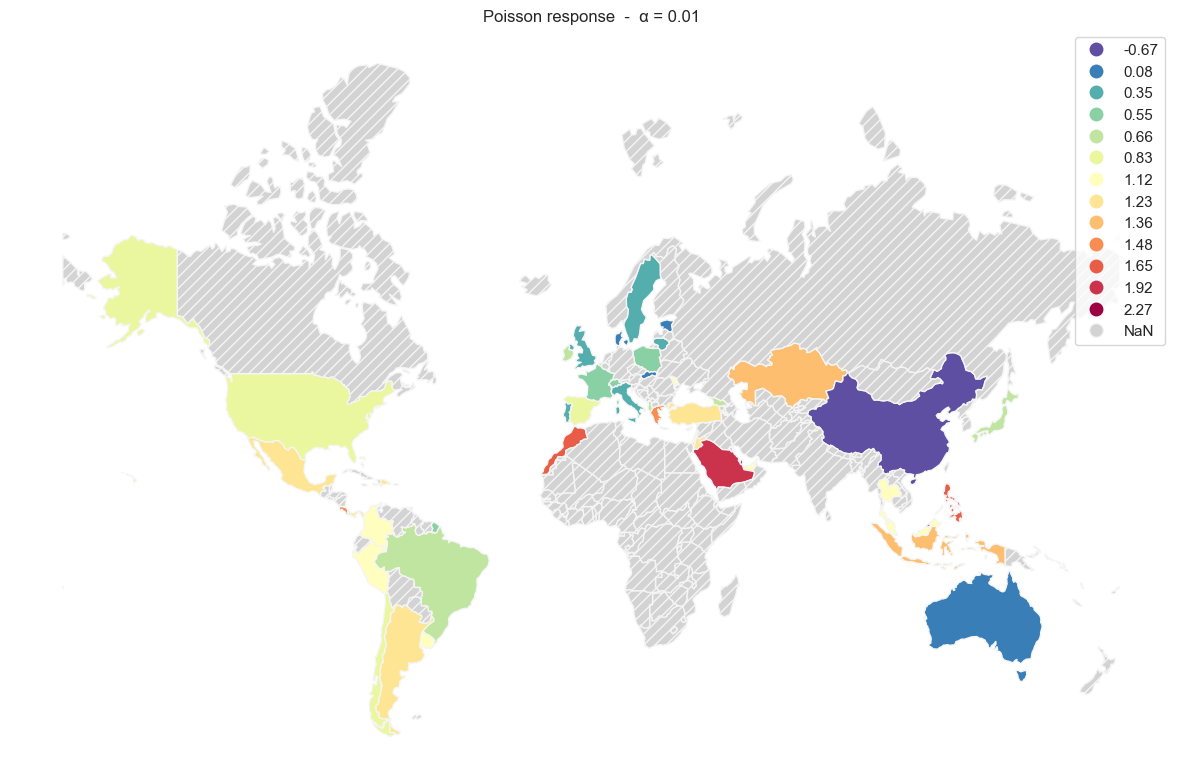

In [30]:
# Remove territories close to the poles for plotting in pseudo mercator and reproject to pm
gdf = gdf[~(gdf.iso_a3.isin(['ATA', 'GRL', 'ATF']))].to_crs('epsg:3857')
gdf['knots'] = gdf.knots.round(2)

orig_map = mpl.colormaps['Spectral']
reversed_map = orig_map.reversed()

gdf.plot(
    column = 'knots',
    figsize = (15,10),
    missing_kwds = {
        'edgecolor': 'whitesmoke',
        'facecolor': 'lightgray',
        "hatch": "///"},
    cmap = reversed_map, #'YlOrBr',
    categorical = True,
    legend = True,
    edgecolors = 'whitesmoke' #'lightgray' #'whitesmoke' #'lightgray'
)

plt.axis('off')
if model == 'P':
  if tol == 0.01:
    plt.title('Poisson response  -  α = 0.01')
    #plt.savefig('Map_Poi_001.pdf', bbox_inches='tight')
  elif tol == 0.05:
    plt.title('Poisson response  -  α = 0.05')
    #plt.savefig('Map_Poi_005.pdf', bbox_inches='tight')
  elif tol == 0.1:
    plt.title('Poisson response  -  α = 0.10')
    #plt.savefig('Map_Poi_010.pdf', bbox_inches='tight')
elif model == 'B':
  if tol == 0.01:
    plt.title('Bernoulli response  -  α = 0.01')
    #plt.savefig('Map_Ber_001.pdf', bbox_inches='tight')
  elif tol == 0.05:
    plt.title('Bernoulli response  -  α = 0.05')
    #plt.savefig('Map_Ber_005.pdf', bbox_inches='tight')
  elif tol == 0.1:
    plt.title('Bernoulli response  -  α = 0.10')
    #plt.savefig('Map_Ber_010.pdf', bbox_inches='tight')

plt.show()

In [31]:
# Remove territories close to the poles for plotting in pseudo mercator and reproject to pm
gdf = gdf[~(gdf.iso_a3.isin(['ATA', 'GRL', 'ATF']))].to_crs('epsg:3857')
gdf['knots'] = gdf.knots.round(2)
gdf = gdf.dropna(subset=['knots'])
gdf

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,cluster,knots,ISO
4,3.282395e+08,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-13674486.249 6274861.394, -13...",United States,1.0,0.83,USA
5,1.851393e+07,Asia,Kazakhstan,KAZ,181665,"POLYGON ((9724867.413 6311418.173, 9640131.701...",Kazakhstan,2.0,1.36,KAZ
8,2.706256e+08,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((15696071.624 -289546.893, 1569...",Indonesia,2.0,1.36,IDN
9,4.493871e+07,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-7640303.070 -6916017.513, -75...",Argentina,12.0,1.23,ARG
10,1.895204e+07,South America,Chile,CHL,282318,"MULTIPOLYGON (((-7640303.070 -6916017.513, -76...",Chile,1.0,0.83,CHL
17,1.073896e+07,North America,Dominican Rep.,DOM,88941,"POLYGON ((-7982531.978 2042816.044, -7980242.4...",Dominican Republic,12.0,1.23,DOM
27,1.275755e+08,North America,Mexico,MEX,1268870,"POLYGON ((-13038602.601 3833789.291, -12912098...",Mexico,12.0,1.23,MEX
28,3.461734e+06,South America,Uruguay,URY,56045,"POLYGON ((-6414800.510 -3531382.939, -6342542....",Uruguay,5.0,1.12,URY
29,2.110495e+08,South America,Brazil,BRA,1839758,"POLYGON ((-5941528.839 -3997743.062, -5972351....",Brazil,10.0,0.66,BRA
31,3.251045e+07,South America,Peru,PER,226848,"POLYGON ((-7780523.882 -478921.391, -7880837.6...",Peru,5.0,1.12,PER


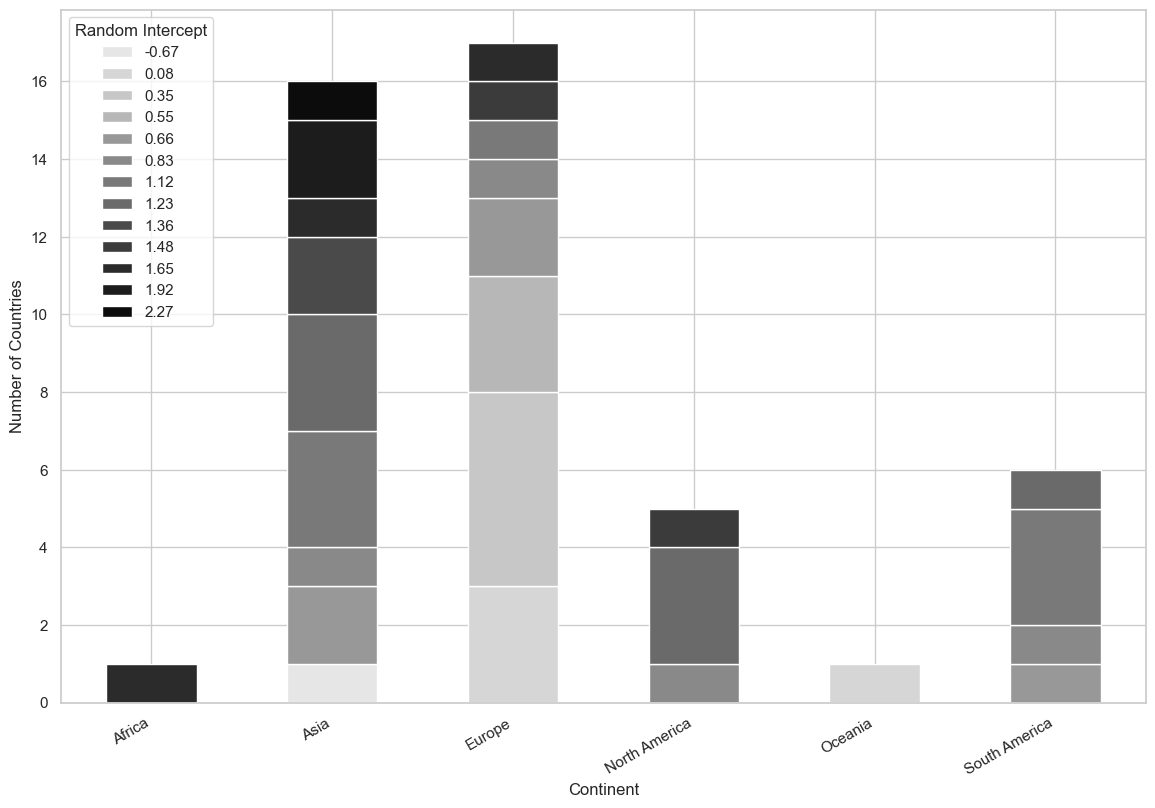

In [71]:
# Create a stacked barplot with a grey color palette
fig, ax = plt.subplots(figsize=(14, 9))

# Group by 'continent' and 'knots', then count the number of countries in each group
grouped_df = gdf.groupby(['continent', 'knots']).size().unstack()

# Create a color palette of greys proportional to knots value
#grey_palette = plt.cm.Greys(np.linspace(0, 1, len(grouped_df.columns)))

# Adjust the grey_palette based on the values of the knots
max_knots = grouped_df.columns.max()
min_knots = grouped_df.columns.min()
scaled_knots = (grouped_df.columns - min_knots) / (max_knots - min_knots)
grey_palette = plt.cm.Greys(scaled_knots)

viridis_big = mpl.colormaps['binary']
newcmp = ListedColormap(viridis_big(np.linspace(0.1, 0.95, 15)))

# Plot the stacked barplot with the specified color palette
grouped_df.plot(kind='bar', stacked=True, ax=ax, cmap=newcmp) #ListedColormap(grey_palette))

# Set labels and title
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

ax.set_xlabel('Continent')
ax.set_ylabel('Number of Countries')
#ax.set_title('Stacked Barplot of Knots by Continent')

# Show legend
ax.legend(loc='upper left', title='Random Intercept') #bbox_to_anchor=(1.05, 1),

# Show the plot
plt.savefig("output/case_study_results/Stackplot_" + str(model) + str(tol) + ".pdf")
plt.show()

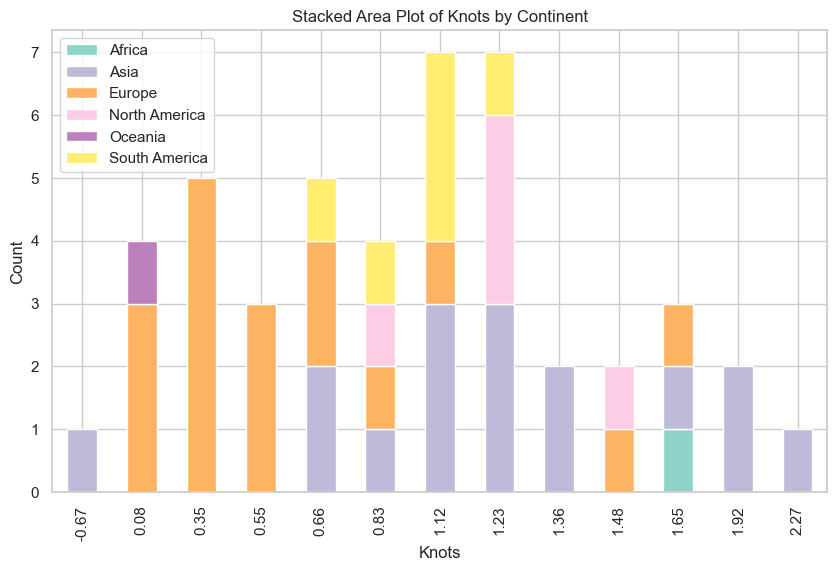

In [620]:
# Group by 'knots' and 'continent', then count the number of countries in each group
grouped_df = gdf.groupby(['knots', 'continent']).size().unstack()

# Create a stacked area plot
fig, ax = plt.subplots(figsize=(10, 6))

grey_palette = plt.cm.Set3(np.linspace(0.05, 1, len(grouped_df.columns)))

# Define hatch patterns for each continent
hatch_patterns = ['/', '\\', '|', '-', '+', 'x', 'o', '*']

# Plot each continent as a stacked area
grouped_df.plot(kind='bar', #'area', 
                stacked=True, ax=ax, cmap=ListedColormap(grey_palette))

# Set labels and title
ax.set_xlabel('Knots')
ax.set_ylabel('Count')
ax.set_title('Stacked Area Plot of Knots by Continent')

# Show legend
ax.legend(loc='upper left')

# Show the plot
plt.show()

/var/folders/lg/0lc2g3rx12jf4ztglsz2bgc80000gn/T/ipykernel_41136/1757781992.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=newcmp(color), label=label)


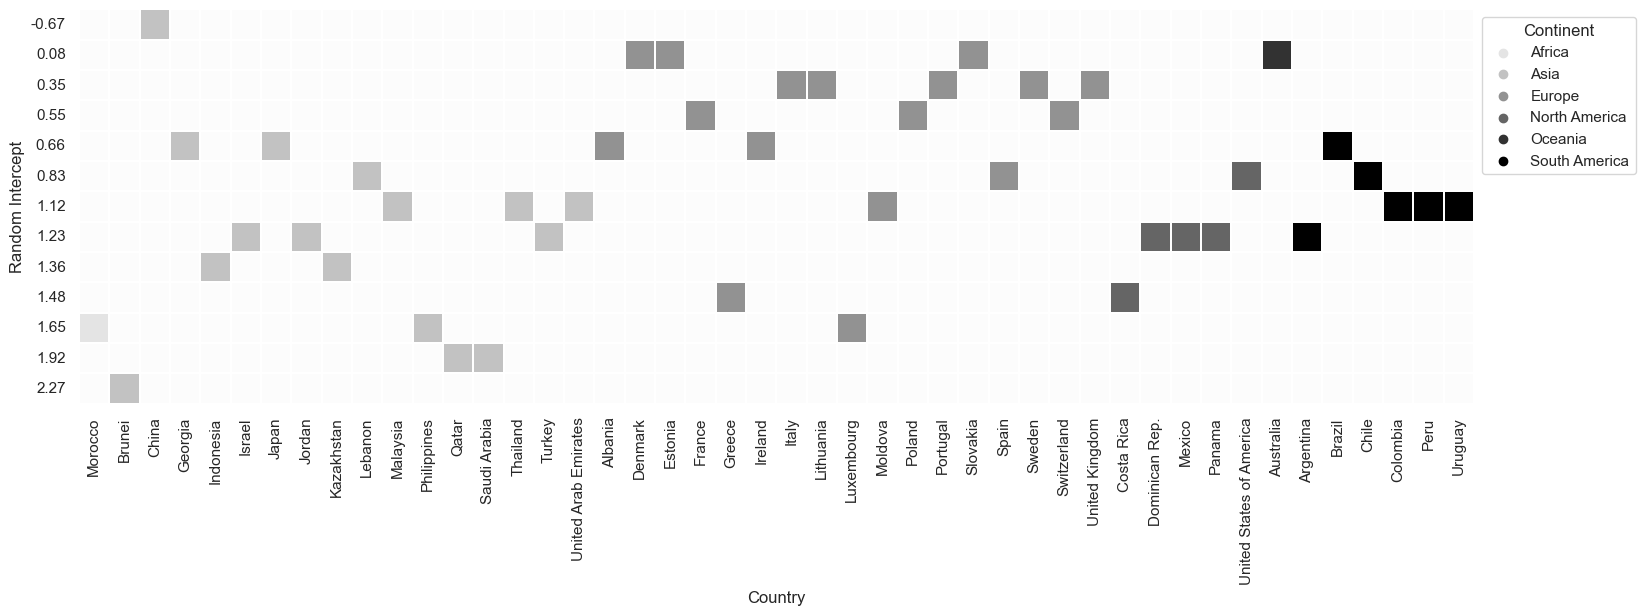

In [56]:
# Order the countries by continent
ordered_countries = gdf.sort_values(by=['continent', 'name'])['name'].unique()

# Map continents to numerical values
continent_numerical_mapping = {
    'Africa': 1,
    'Asia': 2,
    'Europe': 3,
    'North America': 4,
    'Oceania': 5,
    'South America': 6
}

# Create a new column 'continent_numerical' based on the mapping
gdf['continent_numerical'] = gdf['continent'].map(continent_numerical_mapping)

# Create a custom aggregation function to fill with continent_numerical values
def fill_with_continent(series):
    return series.iloc[0] if not series.isnull().all() else 0

# Create a pivot table with knots on the y-axis and countries on the x-axis
pivot_table = gdf.pivot_table(index='knots', columns=['name'], values='continent_numerical', aggfunc=fill_with_continent, fill_value=0)

# Sort the columns based on continent and name
pivot_table = pivot_table.reindex(sorted(pivot_table.columns, key=lambda x: (gdf.loc[gdf['name'] == x, 'continent_numerical'].iloc[0], x)), axis=1)

viridis_big = plt.cm.Greys(np.linspace(0.03, 1, 7))
newcmp = ListedColormap(viridis_big)

# Plot the heatmap using seaborn
plt.figure(figsize=(18, 9))
sns.heatmap(pivot_table, cmap=newcmp, annot=False, fmt='', cbar=False, linewidths=0.05, linecolor='white', square=True,
            cbar_kws=dict(use_gridspec=False, location="top"))

# Plot an invisible scatter plot to create a legend
for label, color in continent_numerical_mapping.items():
    plt.scatter([], [], c=newcmp(color), label=label)

# Create a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Continent')

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Random Intercept')

plt.savefig("output/case_study_results/Heatmap_" + str(model) + str(tol) + ".pdf")
plt.show()

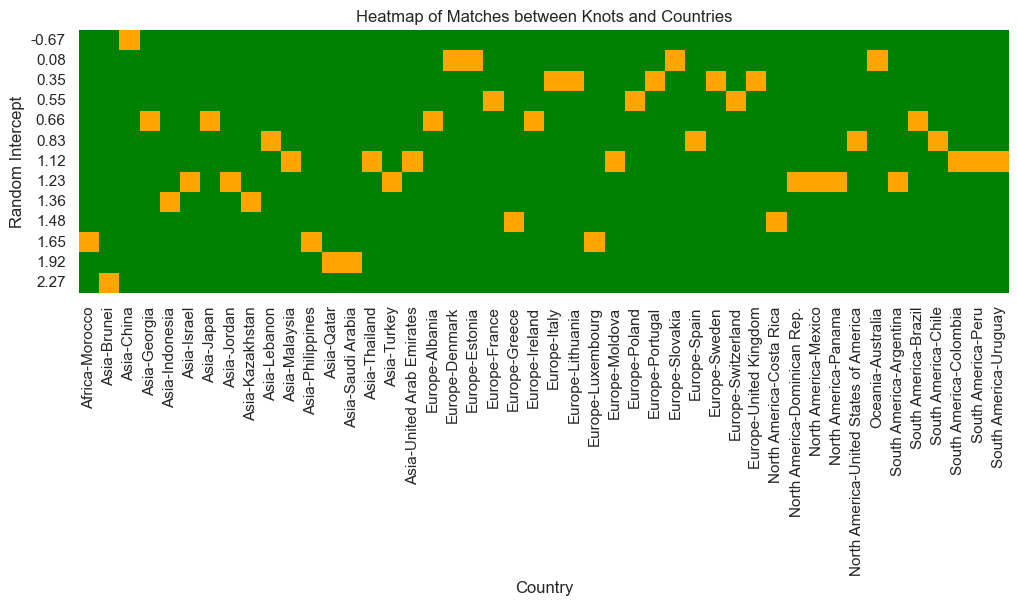

In [636]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Order the countries by continent
ordered_countries = gdf.sort_values(by=['continent', 'name'])['name'].unique()

# Create a pivot table with knots on the y-axis and countries on the x-axis
pivot_table = gdf.pivot_table(index='knots', columns=['continent', 'name'], aggfunc='size', fill_value=0)
# Sort the columns based on continent and name
pivot_table = pivot_table.reindex(sorted(pivot_table.columns, key=lambda x: (x[0], x[1])), axis=1)

# Create a custom color palette for each continent
continent_colors = {
    'Africa': 'orange',
    'Asia': 'red',
    'Europe': 'blue',
    'North America': 'green',
    'Oceania': 'purple',
    'South America': 'brown'
}

# Map continent colors to the countries
country_colors = [continent_colors[gdf[gdf['name'] == country]['continent'].iloc[0]] for country in ordered_countries]

# Create a custom colormap based on the continent colors
custom_cmap = ListedColormap([continent_colors[continent] for continent in gdf['continent'].unique()], N=len(gdf['continent'].unique()))

# Create a heatmap using seaborn with the custom colormap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap=custom_cmap, annot=False, fmt='', cbar=False, square=True)

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Random Intercept')
plt.title('Heatmap of Matches between Knots and Countries')

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Order the countries by continent
ordered_countries = gdf.sort_values(by=['continent', 'name'])['name'].unique()

# Map continents to numerical values
continent_numerical_mapping = {
    'Africa': 1,
    'Asia': 2,
    'Europe': 3,
    'North America': 4,
    'Oceania': 5,
    'South America': 6
}

# Create a new column 'continent_numerical' based on the mapping
gdf['continent_numerical'] = gdf['continent'].map(continent_numerical_mapping)

# Create a custom aggregation function to fill with continent_numerical values
def fill_with_continent(series):
    return series.iloc[0] if not series.isnull().all() else 0

# Create a pivot table with knots on the y-axis and countries on the x-axis
pivot_table = gdf.pivot_table(index='knots', columns=['name'], values='continent_numerical', aggfunc=fill_with_continent, fill_value=0)

# Sort the columns based on continent and name
pivot_table = pivot_table.reindex(sorted(pivot_table.columns, key=lambda x: (gdf.loc[gdf['name'] == x, 'continent_numerical'].iloc[0], x)), axis=1)

# Create a custom colormap
viridis_big = plt.cm.Blues(np.linspace(0, 1, 6))
newcmp = ListedColormap(viridis_big)

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_table, cmap=newcmp, annot=False, fmt='', cbar=False, linewidths=0.05, linecolor='white', square=True)

ncols = 7

# Ensure colorbar is created before trying to set ticks and tick labels
cbar = ax.figure.colorbar(ax.collections[0])
cbar.set_ticks(np.linspace(1, ncols, 2 * ncols + 1)[1::2])
cbar.set_ticklabels(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America', ''])  # Change labels here

# Set labels and title
plt.xlabel('Country and Continent')
plt.ylabel('Knots')
plt.title('Heatmap of Matches between Knots and Countries')
# Show the plot
plt.show()



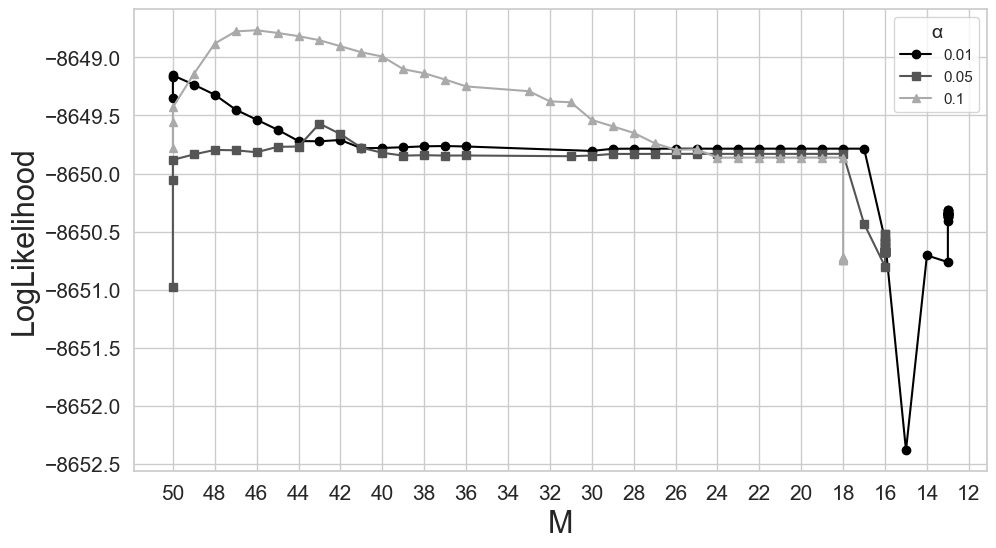

In [487]:
n_fix = 2
ran_var = 'False'
ran_int = 'True'
variab = 'SE'
model = 'P'

path = 'output/case_study_results'

df = pd.DataFrame()

for tol in np.array([0.01, 0.05, 0.1]): 
    fileA = open(path + '/' + ran_var + '_' + ran_int + '_' + str(n_fix) + '_' + variab + '_' + str(tol) + '_' + model + '_merging' +'.pickle','rb')
    knots, par, W, hess_ran, hess_fix, group, modeleval = pickle.load(fileA)

    # Assuming modeleval[0] is a list of arrays
    data = modeleval[1][2:]
    array_lengths = [len(array) for array in modeleval[0]][2:]
    df = pd.concat([df, pd.DataFrame({'α': np.repeat(tol, len(array_lengths)), 'M': array_lengths, 'LogLik': data}) ])
    
df

from matplotlib.ticker import MultipleLocator

custom_palette = sns.color_palette("gray", n_colors=len(df['α'].unique()))

sns.set(style="whitegrid")
plt.figure(figsize=(11, 6))  # Set the figure size as needed

df_sorted = df#.sort_values(by=['α', 'M', 'LogLik'])

categories = df_sorted['α'].unique()

handles = []  # to collect line handles
labels = []   # to collect labels
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*']
for i, category in enumerate(categories):
    category_data = df_sorted[df_sorted['α'] == category]
    line, = plt.plot(category_data['M'], category_data['LogLik'],
                      marker=markers[i], linestyle='-',
                     color=plt.cm.gray(i / len(categories)))
    handles.append(line)
    labels.append(f'{category}')

plt.xlabel('M', fontsize=22)  # Set x-axis label
plt.ylabel('LogLikelihood', fontsize=22)  # Set y-axis label
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=2))

legend = plt.legend(handles, labels)
legend.set_title("α", prop={'size': 14})
plt.gca().invert_xaxis()
plt.savefig("output/case_study_results/LogLik_" + str(model) + ".pdf")
plt.show()

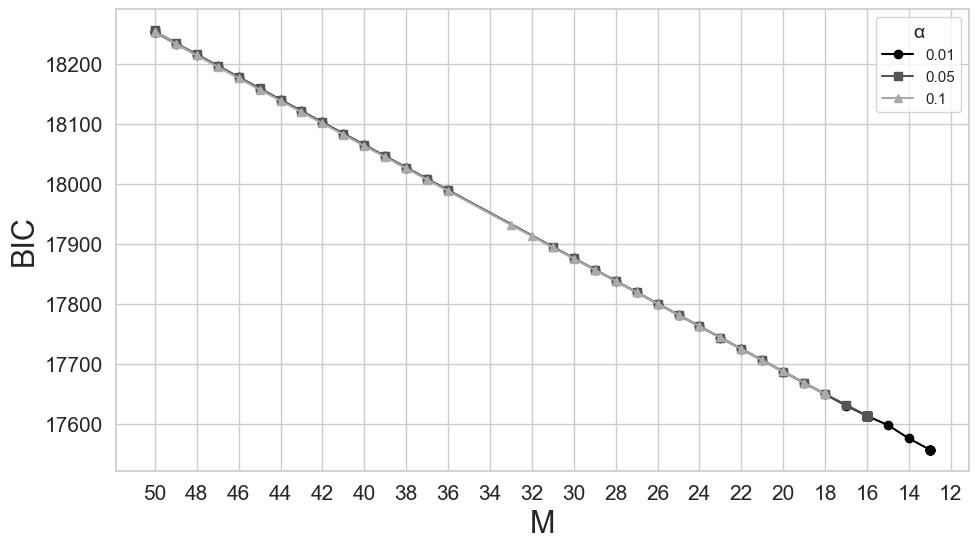

In [488]:
n_fix = 2
ran_var = 'False'
ran_int = 'True'
variab = 'SE'
model = 'P'

path = 'output/case_study_results'

custom_palette = sns.color_palette("gray", n_colors=len(df['α'].unique()))


df = pd.DataFrame()

for tol in np.array([0.01, 0.05, 0.1]): 
    fileA = open(path + '/' + ran_var + '_' + ran_int + '_' + str(n_fix) + '_' + variab + '_' + str(tol) + '_' + model + '_merging' +'.pickle','rb')
    knots, par, W, hess_ran, hess_fix, group, modeleval = pickle.load(fileA)

    # Assuming modeleval[0] is a list of arrays
    data = modeleval[2][2:]
    array_lengths = [len(array) for array in modeleval[0]][2:]
    df = pd.concat([df, pd.DataFrame({'α': np.repeat(tol, len(array_lengths)), 'M': array_lengths, 'BIC': data}) ])
    
df

from matplotlib.ticker import MultipleLocator

custom_palette = sns.color_palette("gray", n_colors=len(df['α'].unique()))

sns.set(style="whitegrid")
plt.figure(figsize=(11, 6))  # Set the figure size as needed

df_sorted = df#.sort_values(by=['α', 'M', 'LogLik'])

categories = df_sorted['α'].unique()


handles = []  # to collect line handles
labels = []   # to collect labels
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*']
for i, category in enumerate(categories):
    category_data = df_sorted[df_sorted['α'] == category]
    line, = plt.plot(category_data['M'], category_data['BIC'],
                      marker=markers[i], linestyle='-',
                     color=plt.cm.gray(i / len(categories)))
    handles.append(line)
    labels.append(f'{category}')

plt.xlabel('M', fontsize=22)  # Set x-axis label
plt.ylabel('BIC', fontsize=22)  # Set y-axis label
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=2))

legend = plt.legend(handles, labels)
legend.set_title("α", prop={'size': 14})
plt.gca().invert_xaxis()
plt.savefig("output/case_study_results/BIC_" + str(model) + ".pdf")
plt.show()

<Figure size 900x600 with 0 Axes>

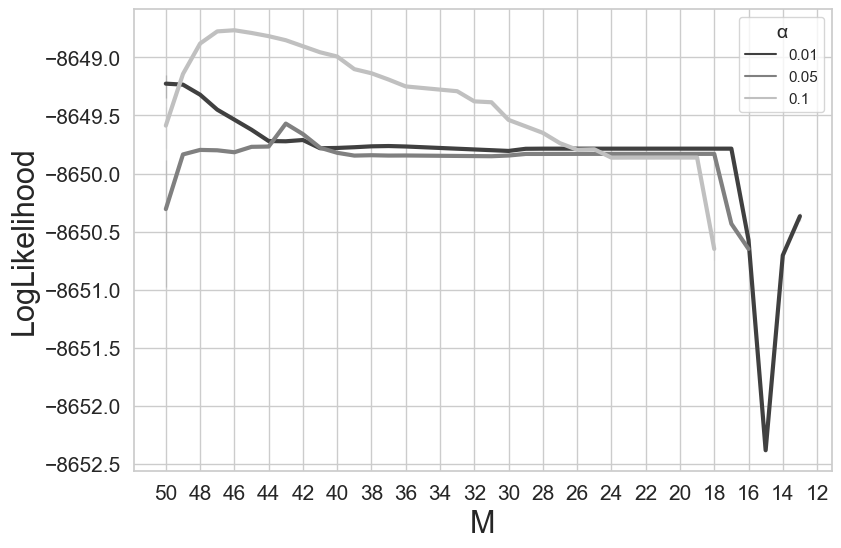

In [432]:
n_fix = 2
ran_var = 'False'
ran_int = 'True'
variab = 'SE'
model = 'P'

path = 'output/case_study_results'

# Set the sampling interval
n = 3  # You can change this to the desired interval

# Create a seaborn plot
sns.set(style="whitegrid")
plt.figure(figsize=(9, 6))  # Set the figure size as needed
df = pd.DataFrame()

for tol in np.array([0.01, 0.05, 0.1]): 
    fileA = open(path + '/' + ran_var + '_' + ran_int + '_' + str(n_fix) + '_' + variab + '_' + str(tol) + '_' + model + '_merging' +'.pickle','rb')
    knots, par, W, hess_ran, hess_fix, group, modeleval = pickle.load(fileA)

    # Assuming modeleval[0] is a list of arrays
    data = modeleval[1][2:]
    array_lengths = [len(array) for array in modeleval[0]][2:]
    df = pd.concat([df, pd.DataFrame({'α': np.repeat(tol, len(array_lengths)), 'M': array_lengths, 'LogLik': data}) ])
    
df

# Create a seaborn plot
from matplotlib.ticker import MultipleLocator

custom_palette = sns.color_palette("gray", n_colors=len(df['α'].unique()))

sns.set(style="whitegrid")
plt.figure(figsize=(9, 6))  # Set the figure size as needed

sns.lineplot(data=df, x='M', y='LogLik', hue='α', linewidth=3, markers=True, 
             dashes=False, palette=custom_palette)#, drawstyle='steps-mid') # style='α'

plt.xlabel('M', fontsize=22)  # Set x-axis label
plt.ylabel('LogLikelihood', fontsize=22)  # Set y-axis label
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=2))

legend = plt.legend()
legend.set_title("α", prop={'size': 14})
plt.gca().invert_xaxis()
plt.savefig("output/case_study_results/LogLik_" + str(model) + ".pdf")
plt.show()

<Figure size 900x600 with 0 Axes>

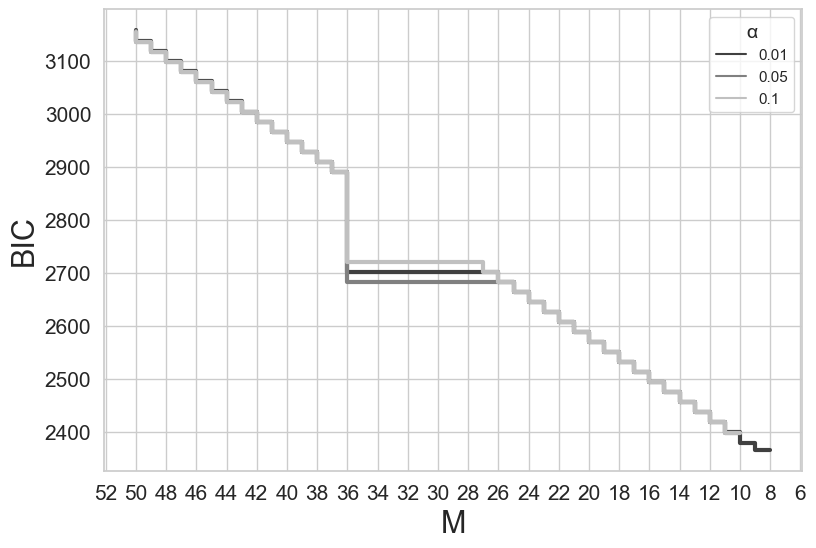

In [412]:
n_fix = 2
ran_var = 'False'
ran_int = 'True'
variab = 'SE'
model = 'B'

path = 'output/case_study_results'

# Set the sampling interval
n = 3  # You can change this to the desired interval

custom_palette = sns.color_palette("gray", n_colors=len(df['α'].unique()))

# Create a seaborn plot
sns.set(style="whitegrid")
plt.figure(figsize=(9, 6))  # Set the figure size as needed
df = pd.DataFrame()

for tol in np.array([0.01, 0.05, 0.1]): 
    fileA = open(path + '/' + ran_var + '_' + ran_int + '_' + str(n_fix) + '_' + variab + '_' + str(tol) + '_' + model + '_merging' +'.pickle','rb')
    knots, par, W, hess_ran, hess_fix, group, modeleval = pickle.load(fileA)

    # Assuming modeleval[0] is a list of arrays
    data = modeleval[2][2:]
    array_lengths = [len(array) for array in modeleval[0]][2:]
    df = pd.concat([df, pd.DataFrame({'α': np.repeat(tol, len(array_lengths)), 'M': array_lengths, 'BIC': data}) ])
    
df

# Create a seaborn plot
from matplotlib.ticker import MultipleLocator

sns.set(style="whitegrid")
plt.figure(figsize=(9, 6))  # Set the figure size as needed

sns.lineplot(data=df, x='M', y='BIC', hue='α', linewidth=3, 
             markers=True, palette=custom_palette, dashes=False, drawstyle='steps-post') # style='α'

plt.xlabel('M', fontsize=22)  # Set x-axis label
plt.ylabel('BIC', fontsize=22)  # Set y-axis label
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=2))

legend = plt.legend()
legend.set_title("α", prop={'size': 14})
plt.gca().invert_xaxis()
plt.savefig("output/case_study_results/BIC_" + str(model) + ".pdf")
plt.show()